<a href="https://colab.research.google.com/github/farhan1503001/Breast-Cancer-Classification-From-Histopathological-Images/blob/master/BreakHTS_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
x_dataset=[]
y_dataset=[]
src=os.listdir('/content/drive/My Drive/40/benign/')
i=0
for filename in src:
    full_file_name='/content/drive/My Drive/40/benign/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=0
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
src=os.listdir('/content/drive/My Drive/40/malignant/')
i=0
for filename in src:
    full_file_name='/content/drive/My Drive/40/malignant/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=1
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
X_dataset=np.array(x_dataset)
Y_dataset=np.array(y_dataset)
Y_dataset=Y_dataset.reshape((2013,1))

In [ ]:
from sklearn.utils import shuffle
X_dataset,Y_dataset = shuffle(X_dataset,Y_dataset, random_state=0)


In [ ]:
X_dataset[1]

array([[[0.6510023 , 0.58088017, 0.7211353 ],
        [0.6502035 , 0.527521  , 0.69635636],
        [0.631714  , 0.5135023 , 0.6858412 ],
        ...,
        [0.8739299 , 0.8739299 , 0.9209887 ],
        [0.8154806 , 0.80928314, 0.865555  ],
        [0.6860491 , 0.6643076 , 0.71403843]],

       [[0.6407038 , 0.56258976, 0.69749427],
        [0.641008  , 0.5203935 , 0.69121146],
        [0.66740644, 0.5603926 , 0.72902006],
        ...,
        [0.86096156, 0.86096156, 0.9080204 ],
        [0.79976803, 0.77340907, 0.83593094],
        [0.77754074, 0.7504771 , 0.80523896]],

       [[0.6442424 , 0.5609747 , 0.7104845 ],
        [0.71337104, 0.6063223 , 0.7749497 ],
        [0.65215117, 0.5580336 , 0.72273946],
        ...,
        [0.7844187 , 0.7844187 , 0.83147764],
        [0.8077381 , 0.8038975 , 0.8654412 ],
        [0.8811034 , 0.86919856, 0.89792544]],

       ...,

       [[0.7439141 , 0.7552784 , 0.7869617 ],
        [0.74504024, 0.7333938 , 0.7804526 ],
        [0.68821836, 0

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_dataset,Y_dataset,test_size=0.20)

In [ ]:
y_train[2]

array([1.], dtype=float32)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
folds=list(StratifiedShuffleSplit(n_splits=5,random_state=42).split(x_train,y_train))

In [ ]:
x=tf.keras.applications.Xception(include_top=False,input_shape=(224,224,3),weights='imagenet')
#pretrain_model_path = '/content/drive/My Drive/v3.h5'
mobile=x
#x.load_weights(pretrain_model_path)
input_image=tf.keras.layers.Input((224,224,3))
x=x (input_image)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1)(x)
out=tf.keras.layers.Activation(activation='sigmoid')(x)

model=tf.keras.Model(inputs=input_image,outputs=out)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 100353    
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 20,961,833
Trainable params: 20,907,305
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
from matplotlib import pyplot as plt

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  rotation_range=7,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     shear_range=0.2,
                                     zoom_range=0.45,
                                     horizontal_flip=True)
val_datagen = ImageDataGenerator(zoom_range=0.45)                                 

Fold 1
Epoch 1/50
46/46 [==============================] - 74s 703ms/step - loss: 0.4953 - accuracy: 0.7730 - val_loss: 0.8801 - val_accuracy: 0.6770
Epoch 2/50
46/46 [==============================] - 29s 634ms/step - loss: 0.1870 - accuracy: 0.9287 - val_loss: 3.1668 - val_accuracy: 0.6708
Epoch 3/50
46/46 [==============================] - 29s 619ms/step - loss: 0.1192 - accuracy: 0.9643 - val_loss: 2.0830 - val_accuracy: 0.6957
Epoch 4/50
46/46 [==============================] - 29s 630ms/step - loss: 0.0867 - accuracy: 0.9681 - val_loss: 3.2078 - val_accuracy: 0.6770
Epoch 5/50
46/46 [==============================] - 29s 628ms/step - loss: 0.0736 - accuracy: 0.9715 - val_loss: 0.8736 - val_accuracy: 0.8137
Epoch 6/50
46/46 [==============================] - 29s 625ms/step - loss: 0.0423 - accuracy: 0.9857 - val_loss: 0.6211 - val_accuracy: 0.8944
Epoch 7/50
46/46 [==============================] - 29s 626ms/step - loss: 0.0528 - accuracy: 0.9793 - val_loss: 0.2986 - val_accuracy:

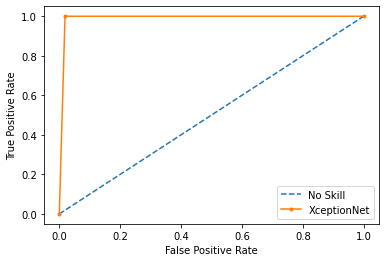

Fold 2
Epoch 1/50
46/46 [==============================] - 29s 627ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 6.4528e-08 - val_accuracy: 1.0000
Epoch 2/50
46/46 [==============================] - 29s 625ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 1.4494e-07 - val_accuracy: 1.0000
Epoch 3/50
46/46 [==============================] - 29s 628ms/step - loss: 0.0227 - accuracy: 0.9945 - val_loss: 5.5085e-07 - val_accuracy: 1.0000
Epoch 4/50
46/46 [==============================] - 29s 628ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 4.2546e-07 - val_accuracy: 1.0000
Epoch 5/50
46/46 [==============================] - 29s 629ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 2.6661e-06 - val_accuracy: 1.0000
Epoch 6/50
46/46 [==============================] - 29s 626ms/step - loss: 0.0201 - accuracy: 0.9945 - val_loss: 2.9303e-05 - val_accuracy: 1.0000
Epoch 7/50
46/46 [==============================] - 29s 628ms/step - loss: 0.0020 - accuracy: 0.9986 - val_loss

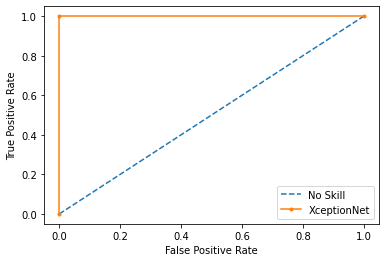

Fold 3
Epoch 1/50
46/46 [==============================] - 29s 631ms/step - loss: 0.0038 - accuracy: 0.9986 - val_loss: 1.2592e-05 - val_accuracy: 1.0000
Epoch 2/50
46/46 [==============================] - 29s 628ms/step - loss: 0.0041 - accuracy: 0.9979 - val_loss: 2.1934e-05 - val_accuracy: 1.0000
Epoch 3/50
46/46 [==============================] - 29s 626ms/step - loss: 2.1042e-04 - accuracy: 1.0000 - val_loss: 4.1751e-09 - val_accuracy: 1.0000
Epoch 4/50
46/46 [==============================] - 29s 627ms/step - loss: 0.0109 - accuracy: 0.9986 - val_loss: 6.0871e-08 - val_accuracy: 1.0000
Epoch 5/50
46/46 [==============================] - 29s 626ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 5.5879e-08 - val_accuracy: 1.0000
Epoch 6/50
46/46 [==============================] - 29s 632ms/step - loss: 4.3958e-04 - accuracy: 1.0000 - val_loss: 1.3184e-07 - val_accuracy: 1.0000
Epoch 7/50
46/46 [==============================] - 29s 626ms/step - loss: 0.0013 - accuracy: 0.9993 - 

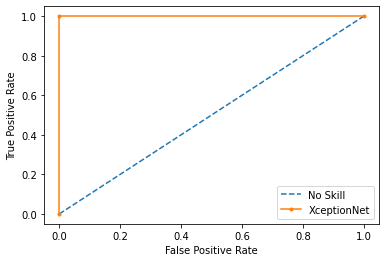

Fold 4
Epoch 1/50
46/46 [==============================] - 29s 626ms/step - loss: 2.3955e-04 - accuracy: 1.0000 - val_loss: 3.1250e-09 - val_accuracy: 1.0000
Epoch 2/50
46/46 [==============================] - 29s 627ms/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 4.8919e-08 - val_accuracy: 1.0000
Epoch 3/50
46/46 [==============================] - 29s 631ms/step - loss: 9.7896e-04 - accuracy: 0.9993 - val_loss: 6.7786e-08 - val_accuracy: 1.0000
Epoch 4/50
46/46 [==============================] - 29s 623ms/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 9.7966e-09 - val_accuracy: 1.0000
Epoch 5/50
46/46 [==============================] - 29s 623ms/step - loss: 1.7697e-04 - accuracy: 1.0000 - val_loss: 6.2617e-07 - val_accuracy: 1.0000
Epoch 6/50
46/46 [==============================] - 29s 629ms/step - loss: 0.0014 - accuracy: 0.9993 - val_loss: 2.7030e-07 - val_accuracy: 1.0000
Epoch 7/50
46/46 [==============================] - 29s 629ms/step - loss: 0.0154 - accuracy: 0.998

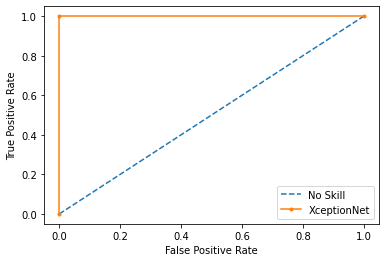

Fold 5
Epoch 1/50
46/46 [==============================] - 29s 626ms/step - loss: 1.3012e-05 - accuracy: 1.0000 - val_loss: 1.6463e-12 - val_accuracy: 1.0000
Epoch 2/50
46/46 [==============================] - 29s 628ms/step - loss: 1.5146e-04 - accuracy: 1.0000 - val_loss: 7.0039e-06 - val_accuracy: 1.0000
Epoch 3/50
46/46 [==============================] - 29s 627ms/step - loss: 0.0494 - accuracy: 0.9979 - val_loss: 1.3189e-04 - val_accuracy: 1.0000
Epoch 4/50
46/46 [==============================] - 29s 625ms/step - loss: 4.1634e-05 - accuracy: 1.0000 - val_loss: 8.4804e-05 - val_accuracy: 1.0000
Epoch 5/50
46/46 [==============================] - 29s 627ms/step - loss: 0.0030 - accuracy: 0.9986 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/50
46/46 [==============================] - 29s 623ms/step - loss: 2.1776e-04 - accuracy: 1.0000 - val_loss: 2.0873e-05 - val_accuracy: 1.0000
Epoch 7/50
46/46 [==============================] - 29s 628ms/step - loss: 0.0014 - accuracy: 0.998

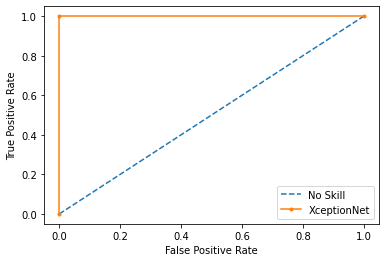

In [ ]:
History=[]
Prescore=[]
Recall=[]
F1=[]
Sensspeci=[]
Roc_auc=[]
for j,(train_idx,val_idx) in enumerate(folds):
    print("Fold "+str(j+1))
    
    x_train=X_dataset[train_idx]
    y_train=Y_dataset[train_idx]
    x_val=X_dataset[val_idx]
    y_val=Y_dataset[val_idx]
    history=model.fit(train_datagen.flow(x_train,y_train),batch_size=32,epochs=50,validation_data=(x_val,y_val))
    y_predict=model.predict(x_val)
    Y_predict=np.float32(y_predict>0.50)
    #print(y_val)
    l=len(y_val)
    Y_predict=np.reshape(Y_predict,(l,1))
    #print(Y_predict)
    prescore=precision_score(y_val,Y_predict,average='binary')
    recaller=recall_score(y_val,Y_predict,average='binary')
    score=f1_score(y_val,Y_predict,average='binary')
    sensitivity=sensitivity_specificity_support(y_val,Y_predict,average='binary')
    fpr, tpr, thresholds = roc_curve(y_val,Y_predict)
    auc = roc_auc_score(y_val, Y_predict)
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    print("AUC: ",auc)
    
    History.append(history)
    Prescore.append(prescore)
    F1.append(score)
    Recall.append(recaller)
    Sensspeci.append(sensitivity)
    plt.plot([0,1],[0,1], linestyle='--', label='No Skill')
    plt.plot(fpr,tpr, marker='.', label='XceptionNet')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [ ]:
val_acc=History[0].history['val_accuracy']
val_acc1=History[1].history['val_accuracy']
val_acc2=History[2].history['val_accuracy']
val_acc3=History[3].history['val_accuracy']
val_acc4=History[4].history['val_accuracy']
Accuracvalid1=val_acc[9]
Accuracyvalid2=val_acc1[9]
Accuracyvalid3=val_acc2[9]
Accuracyvalid4=val_acc3[9]
Accuracyvalid5=val_acc4[9]
Mean_valid_Accuracy=(Accuracvalid1+Accuracyvalid2+Accuracyvalid3+Accuracyvalid4+Accuracyvalid5)/5.00
print("validation Accuracy for Fold-1 ",Accuracvalid1)
print("validation Accuracy for Fold-2",Accuracyvalid2)
print("Validation Accuracy for Fold-3 ",Accuracyvalid3)
print("Validation Accuracy for Fold-4  ",Accuracyvalid4)
print("Validation Accuracy for Fold-5  ",Accuracyvalid5)
print("Mean Validation Accuracy ",Mean_valid_Accuracy)

validation Accuracy for Fold-1  0.9627329111099243
validation Accuracy for Fold-2 1.0
Validation Accuracy for Fold-3  1.0
Validation Accuracy for Fold-4   1.0
Validation Accuracy for Fold-5   1.0
Mean Validation Accuracy  0.9925465822219849


# Accuracy in run 1
validation Accuracy for Fold-1  0.9478908181190491

validation Accuracy for Fold-2 0.9950371980667114

Validation Accuracy for Fold-3  0.9975185990333557

Validation Accuracy for Fold-4   0.9950248599052429

Validation Accuracy for Fold-5   0.9950248599052429

Mean Validation Accuracy  0.9860992670059204

In [ ]:
print("Printing the precision scores and average of them")
avg=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Prescore[i])
  avg=avg+Prescore[i]

print("Average precision-score ",avg/5.00)


Printing the precision scores and average of them
Precision of Fold - 1 0.9908256880733946
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average precision-score  0.998165137614679


In [ ]:
print("Printing the recall scores and average of them")
avgr=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Recall[i])
  avgr=avgr+Recall[i]

print("Average recall-score ",avgr/5.00)


Printing the recall scores and average of them
Precision of Fold - 1 1.0
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average recall-score  1.0


In [ ]:
print("Printing the F-1 scores and average of them")
avgf=0.0
for i in range(5):
  print("Precision of Fold -",i+1,F1[i])
  avgf=avgf+F1[i]

print("Average f1-score ",avgf/5.00)

Printing the F-1 scores and average of them
Precision of Fold - 1 0.9953917050691244
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average f1-score  0.9990783410138249


In [ ]:
print("Printing the sensitivity scores and average of them")
avgsen=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Sensspeci[i][0])
  avgsen=avgsen+Sensspeci[i][0]

print("Average sensitivity-score ",avgsen/5.00)

Printing the sensitivity scores and average of them
Precision of Fold - 1 1.0
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average sensitivity-score  1.0


In [ ]:
print("Printing the specificity scores and average of them")
avgsp=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Sensspeci[i][1])
  avgsp=avgsp+Sensspeci[i][1]

print("Average specificity-score ",avgsp/5.00)

Printing the specificity scores and average of them
Precision of Fold - 1 0.9811320754716981
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average specificity-score  0.9962264150943396


In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_predict[3]

array([1.], dtype=float32)

In [ ]:
predict=np.float32(y_predict>0.50)

In [ ]:
predict=np.reshape(predict,(403,1))
print(predict)

[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
metrics=confusion_matrix(y_test,predict)
print(metrics)

[[135   1]
 [  1 266]]


In [ ]:
from sklearn.metrics import auc,roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
auc = roc_auc_score(y_test, y_predict)

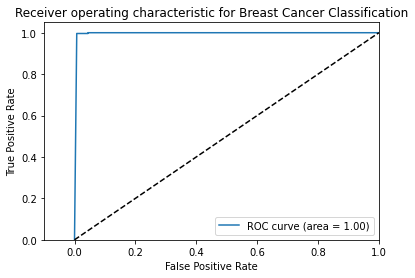

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Breast Cancer Classification')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

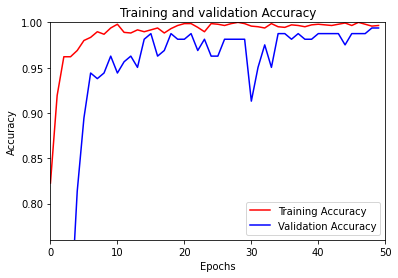

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc=History[0].history['accuracy']
val_acc=History[0].history['val_accuracy']
loss=History[0].history['loss']
val_loss=History[0].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.760,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

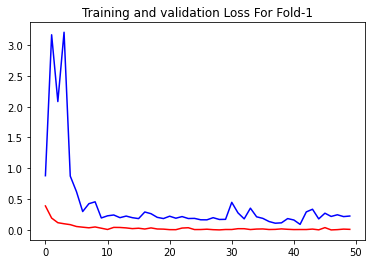

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-1")
plt.figure()

<Figure size 432x288 with 0 Axes>

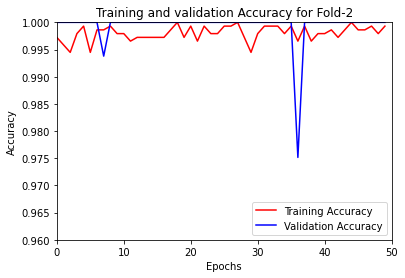

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc=History[1].history['accuracy']
val_acc=History[1].history['val_accuracy']
loss=History[1].history['loss']
val_loss=History[1].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.96,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy for Fold-2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

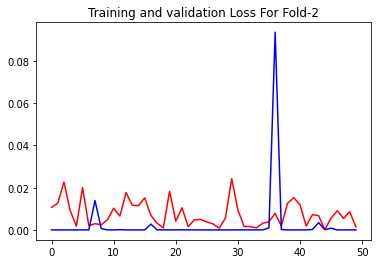

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-2")
plt.figure()

<Figure size 432x288 with 0 Axes>

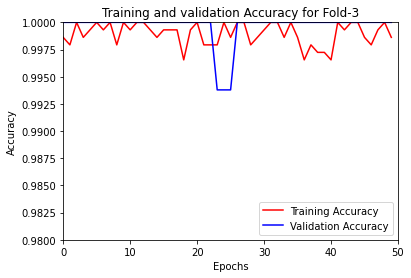

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=History[2].history['accuracy']
val_acc=History[2].history['val_accuracy']
loss=History[2].history['loss']
val_loss=History[2].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.98,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy for Fold-3")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

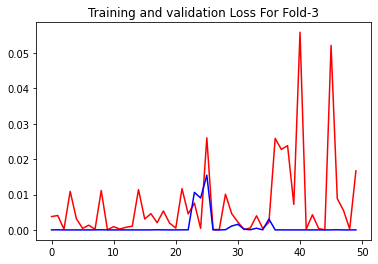

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-3")
plt.figure()

<Figure size 432x288 with 0 Axes>

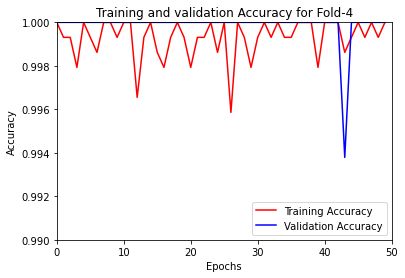

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=History[3].history['accuracy']
val_acc=History[3].history['val_accuracy']
loss=History[3].history['loss']
val_loss=History[3].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.99,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy for Fold-4")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

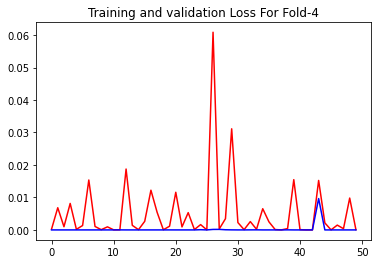

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-4")
plt.figure()

<Figure size 432x288 with 0 Axes>

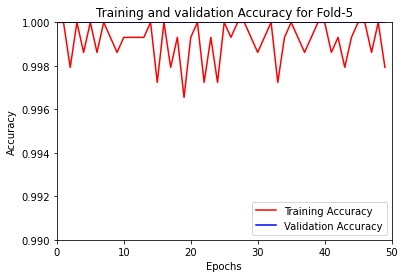

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=History[4].history['accuracy']
val_acc=History[4].history['val_accuracy']
loss=History[4].history['loss']
val_loss=History[4].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.99,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy for Fold-5")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

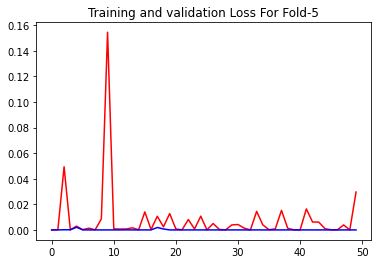

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-5")
plt.figure()